# Seaborn

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

In [4]:
pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# It will auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

In [5]:
# custom data
# cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


# Distribution plots

# 1. Distribution plot

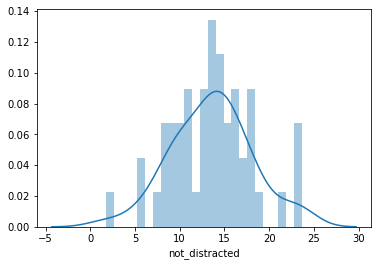

In [8]:
sns.distplot(crash_df['not_distracted'], kde=True, bins=25) 
# kde = Kernal Density Estimation

# 2.Joint Plot

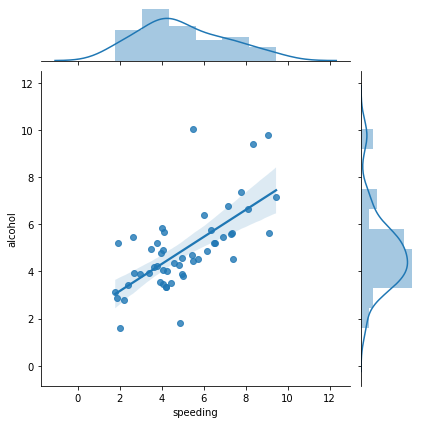

In [10]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

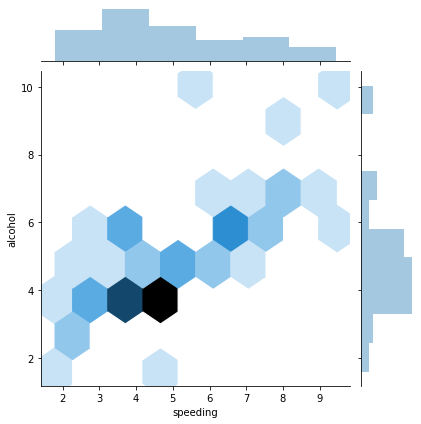

In [12]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

# 3.KDE Plot

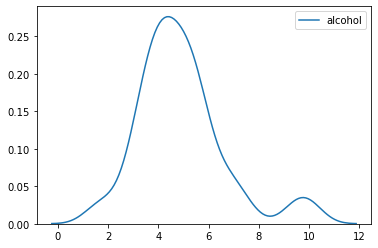

In [14]:
sns.kdeplot(crash_df['alcohol'])

# 4.Pair Plots

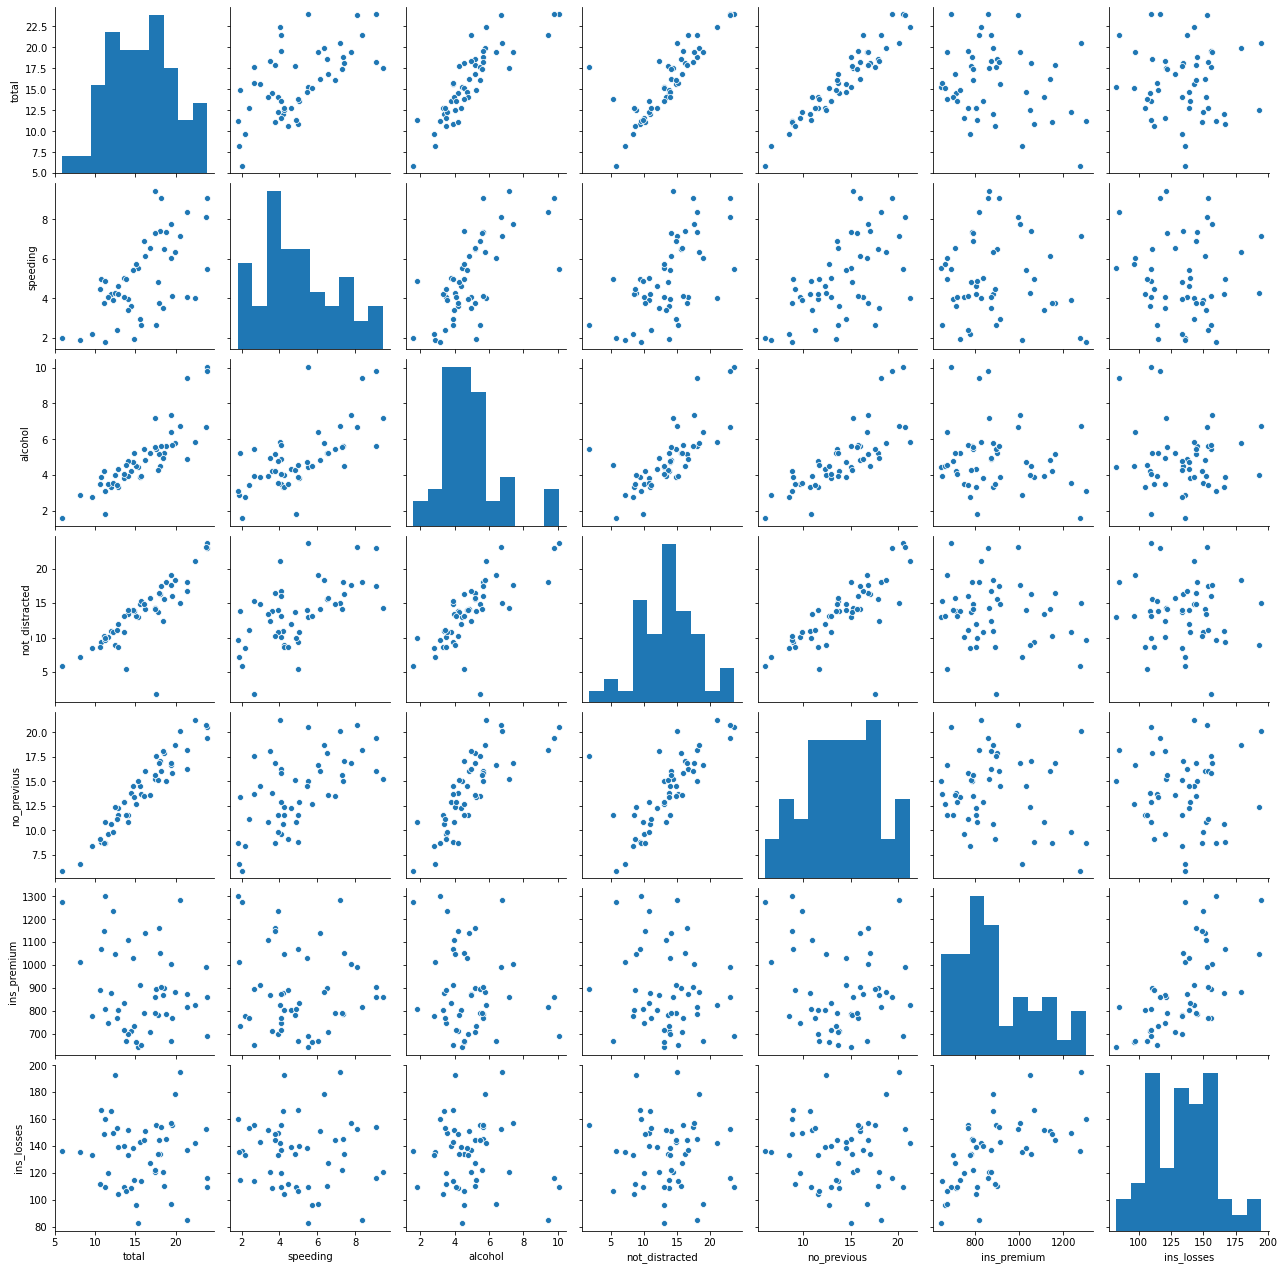

In [23]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

# 5. Rug Plots

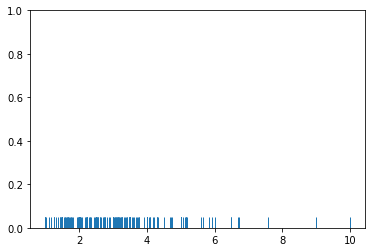

In [22]:
sns.rugplot(tips_df['tip'])

# Styling

<Figure size 576x288 with 0 Axes>

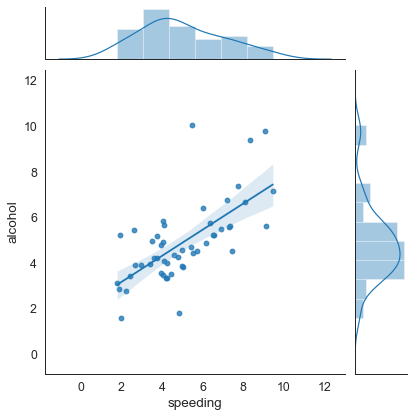

In [25]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

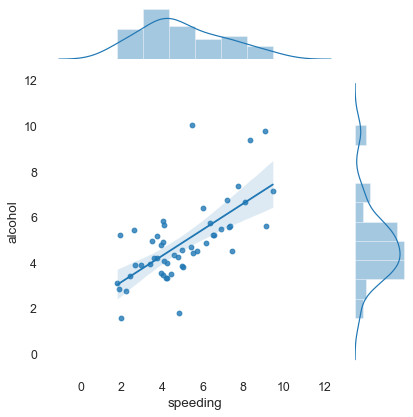

In [28]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
sns.despine(left=True, bottom=True)

# Categorical Plots

# 1. Bar Plots

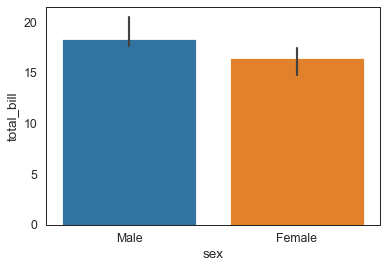

In [30]:
sns.barplot(x='sex',y='total_bill',data=tips_df, estimator=np.median) 
# With estimator you can define functions to use other than the mean like those(mean is by default)
# provided by NumPy : median, std, var, cov or make your own functions

# 2. Count Plot

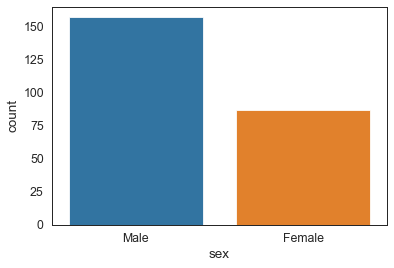

In [32]:
# A count plot is like a bar plot, but the estimator is counting
sns.countplot(x='sex',data=tips_df)

# 3. Box Plot

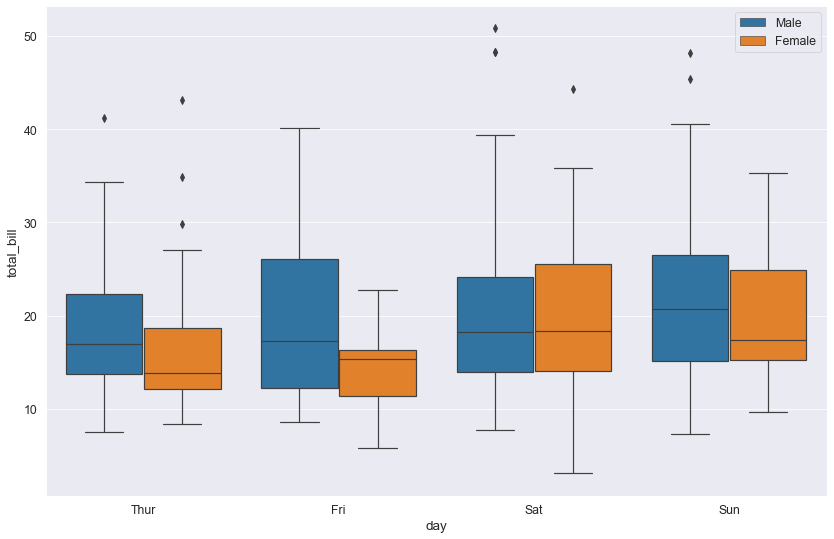

In [34]:
# A box plot allows you to compare different variables
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers(which is on the top of the boxes) extend to all the other data aside from the points that are considered to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

# 4. Violin Plot

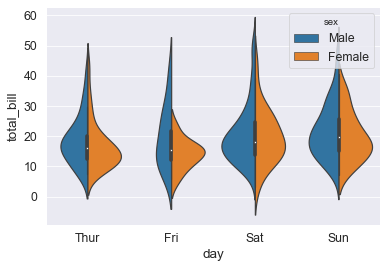

In [36]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

# 5. Swarm Plot

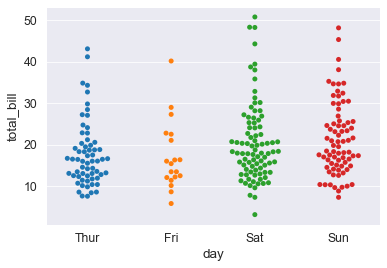

In [39]:
sns.swarmplot(x='day',y='total_bill',data=tips_df)

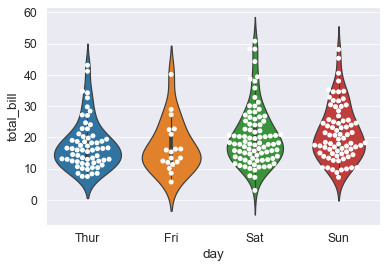

In [41]:
# Combination of the violin and swarmplot
# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')

# 6. Strip Plot

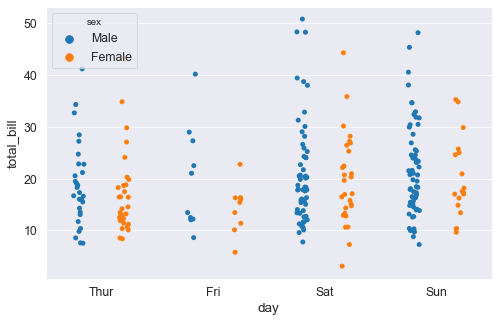

In [42]:
# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution

plt.figure(figsize=(8,5))

sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data

# Palettes

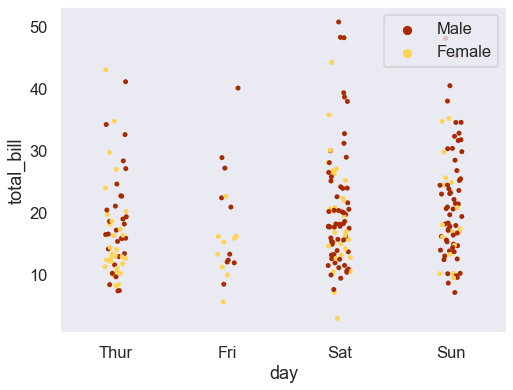

In [47]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='afmhot')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,

plt.legend(loc=1)

# Matrix Plots

# 1. Heat Maps

In [49]:
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()
crash_mx


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Figure size 576x432 with 0 Axes>

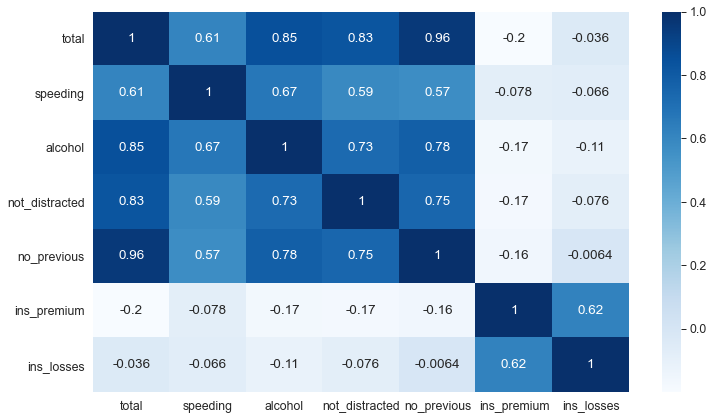

In [66]:
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [67]:
# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each.
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')

flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


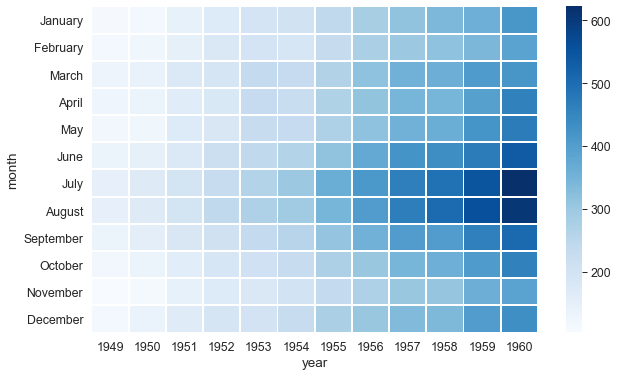

In [68]:
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1.4)

# We see that flights have increased over time and that most people travel in July and August
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

# 2.Cluster map

In [86]:
# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


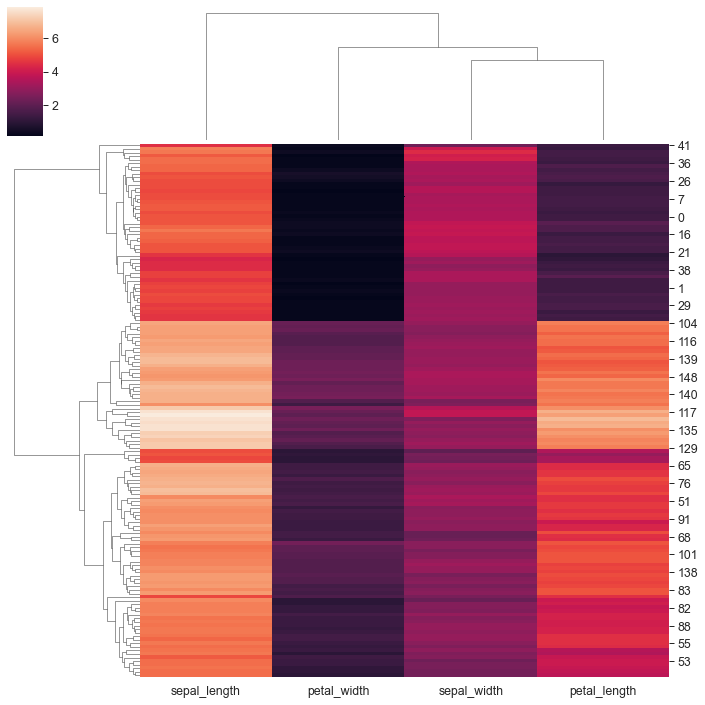

In [82]:
# Return values for species
species = iris.pop("species")
sns.clustermap(iris)

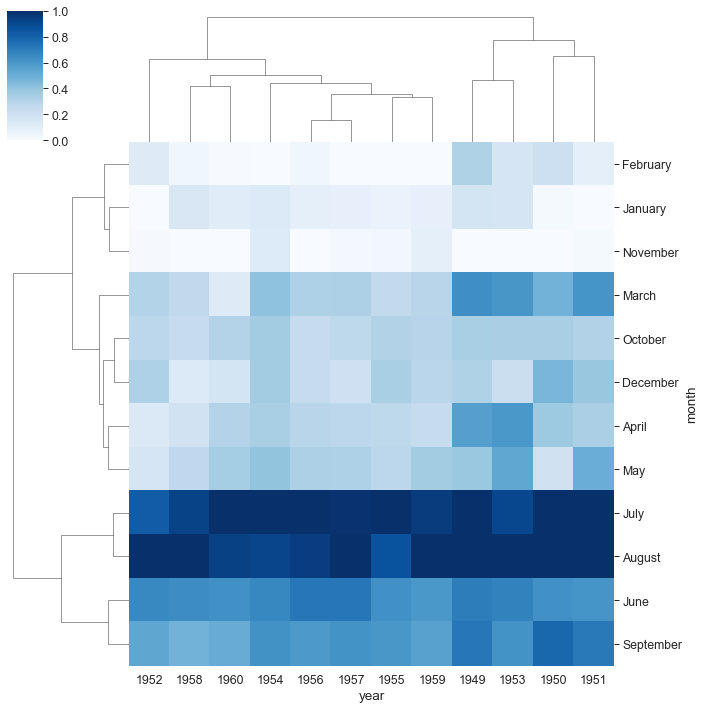

In [84]:
# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)

# 3. Pair Grid

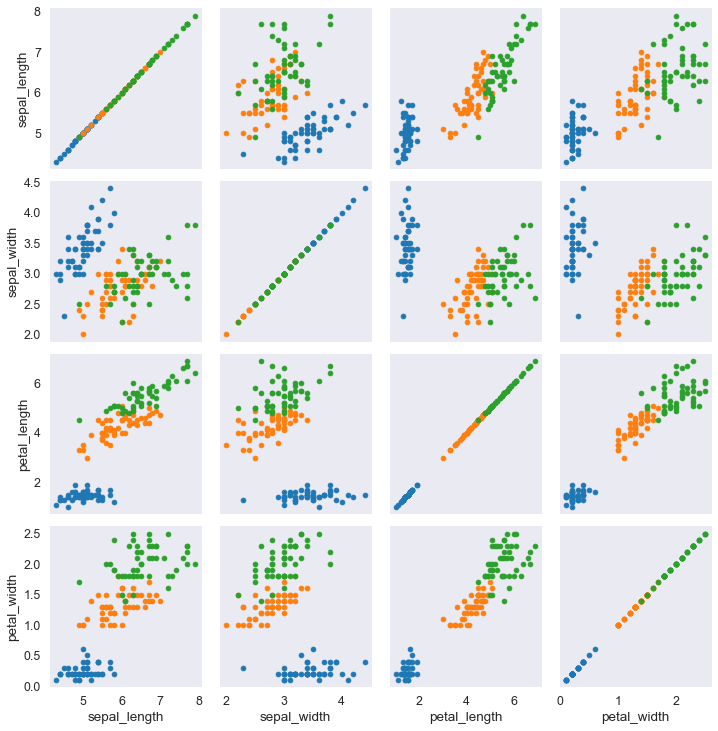

In [89]:
# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
iris_g.map(plt.scatter)

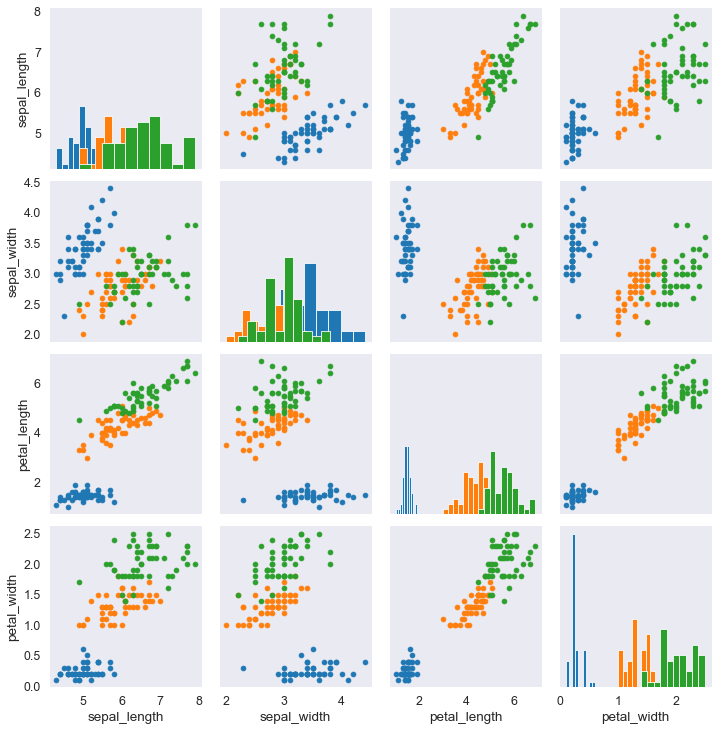

In [93]:
# Put a histogram on the diagonal
iris_g = sns.PairGrid(iris, hue="species")
iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
iris_g.map_offdiag(plt.scatter)

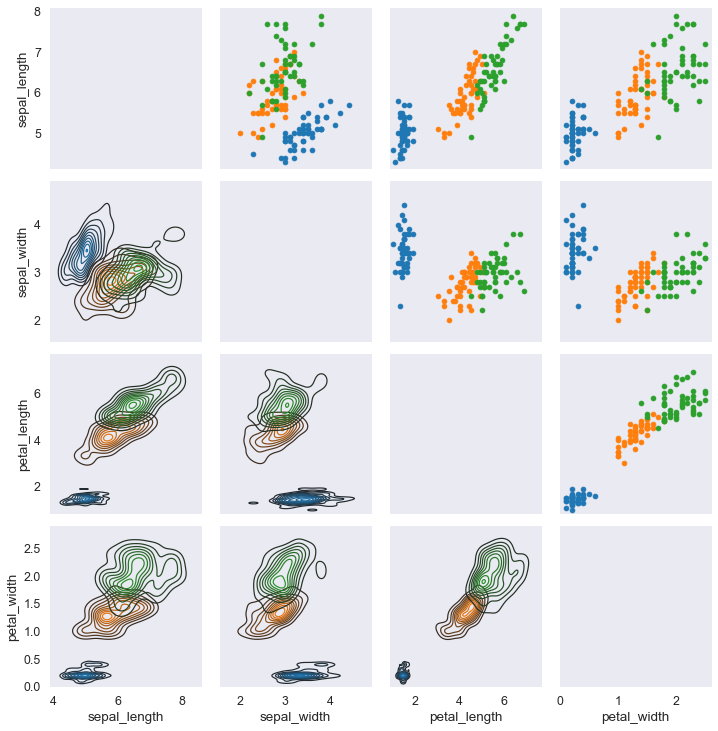

In [94]:
# Have different plots in upper, lower and diagonal
iris_g = sns.PairGrid(iris, hue="species")
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

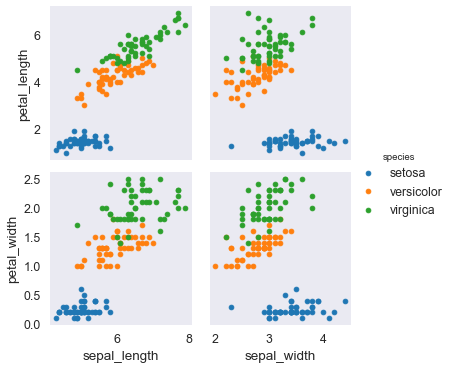

In [95]:
# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend()

# 4. Facet Grid

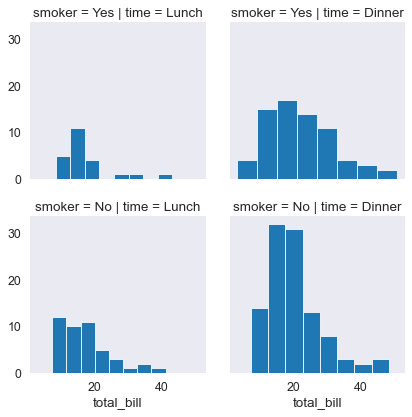

In [96]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
tips_fg.map(plt.hist, "total_bill", bins=8)

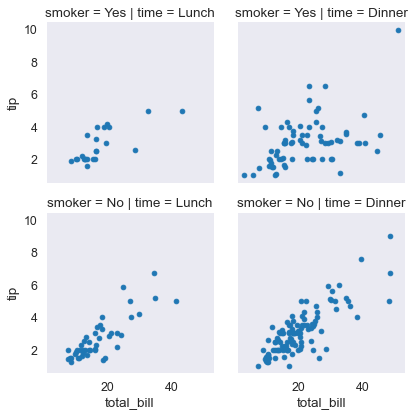

In [97]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# Create a scatter plot with data on total bill & tip (You need to parameters)
tips_fg.map(plt.scatter, "total_bill", "tip")

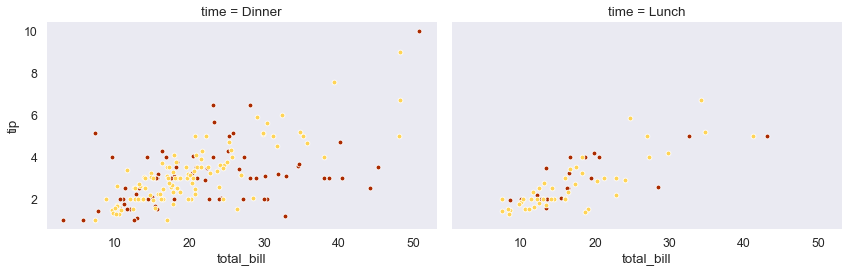

In [100]:
# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.5,
                      col_order=['Dinner', 'Lunch'], palette='afmhot')
tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

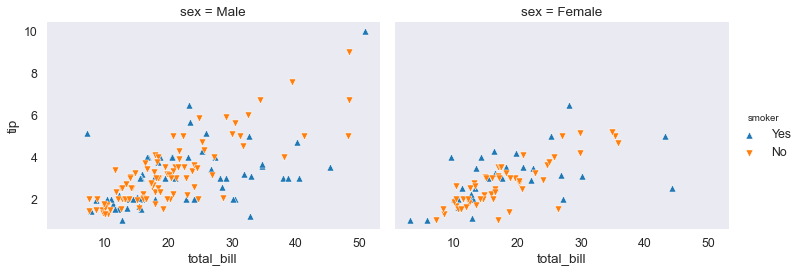

In [101]:
# Define size, linewidth and assign a color of white to markers
kws = dict(s=50, linewidth=.5, edgecolor="w")
# Define that we want to assign different markers to smokers and non
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                        hue_order=['Yes','No'], 
                        hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
tips_fg.add_legend()

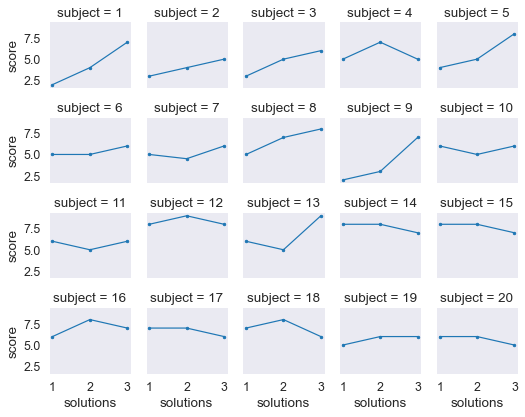

In [102]:
# This dataframe provides scores for different students based on the level of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

# 5. Regression Plot

In [116]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

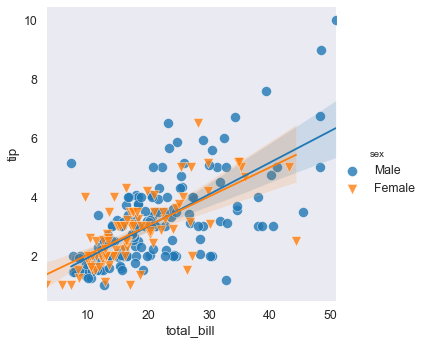

In [117]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', 'v'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

In [118]:
# You can separate the data into separate columns for day data
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


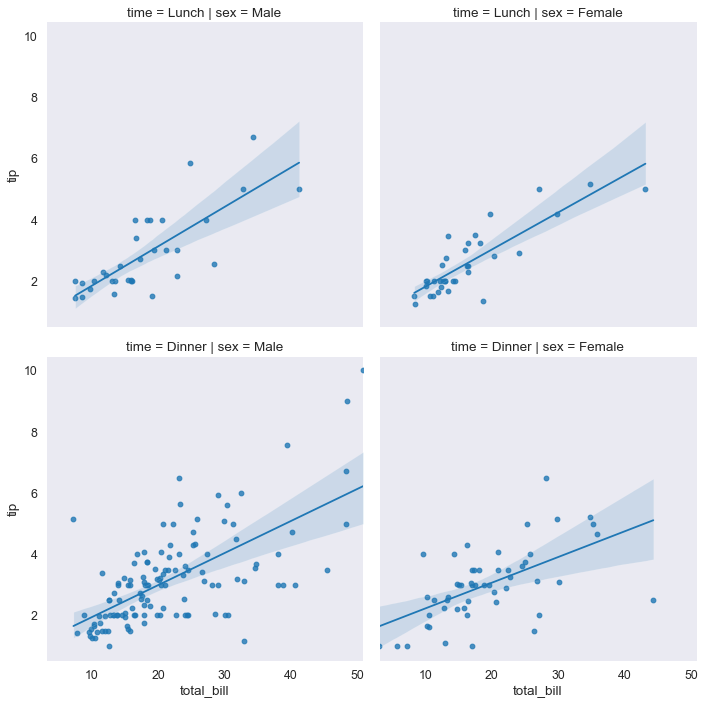

In [119]:
# You can separate the data into separate columns for day data
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)

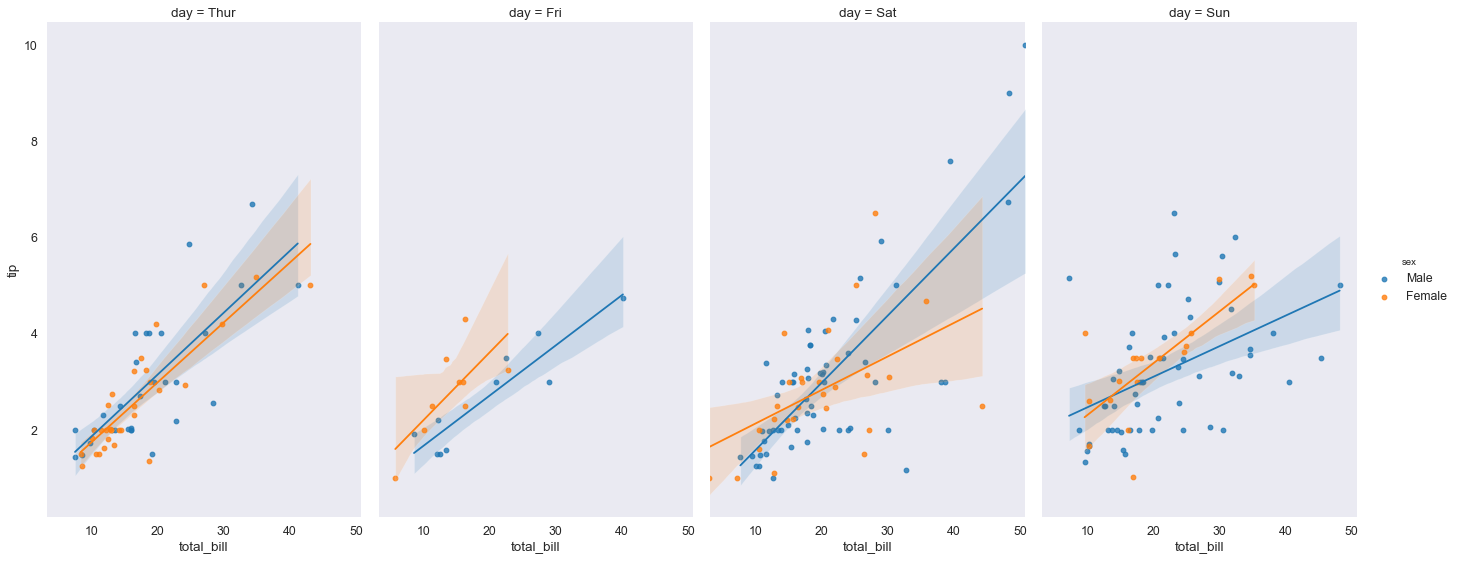

In [125]:
# Makes the fonts more readable
sns.set_context('paper', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)